<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_sdc.png">


<center><h1 style="font-size:2em;color:#2467C0"> Algoritmo de dirección
 </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="figuras/direccion.png" align="middle" style="width:550px;"/></td>
<td>
    
    
**Objetivo:**
    
    
En esta lección se mostrará el algoritmo de direccion.
   
<br>
</td>
</tr>
</table>

# Cargar librerias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Función de binarización 

In [2]:
#Definir la función de binarización
def binarizacion(imagen):
    img = cv.cvtColor(imagen, cv.COLOR_BGR2RGB)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_gauss = cv.GaussianBlur(img_gray,(3,3),0)
    thr, img_thr= cv.threshold(img_gauss ,160 ,255,cv.THRESH_BINARY)
    alto=img.shape[0]
    ancho=img.shape[1]
    ratio=0.2
    img_r = cv.resize(img_thr,(480,240), interpolation=cv.INTER_NEAREST)
    return(img_r)

# Función de área de interés

In [3]:
#Poligono de área de interés
ld = (35, 150)
lu = (30, 238)
ru = (450, 238)
rd = (440, 150)

pts_poligono = np.array([ld, rd, ru, lu], np.int32)
pts_poligono = pts_poligono.reshape((-1,1,2))

In [4]:
#Funcion de área de interés
def area_interes(imagen):
    
    ld = (35, 150)
    lu = (30, 238)
    ru = (450, 238)
    rd = (440, 150)

    pts1 = np.float32([ld, rd, lu, ru])
    pts2 = np.float32([[0, 0], [480, 0], [0, 240], [480, 240]])
    matrix = cv.getPerspectiveTransform(pts1, pts2)
    img_warp = cv.warpPerspective(imagen, matrix, (480, 240))
    return (img_warp)

# Función de punto medio 

In [5]:
#Función para encontrar el punto medio
def punto_medio(imagen):
    img_cercana = imagen[220:, :]
    suma_columnas = np.uint64(np.where(img_cercana.sum(axis=0) > 100, 0, 1020))
    x_pos = np.arange(len(suma_columnas))
    mid_point = int( np.dot(x_pos,suma_columnas) / np.sum( suma_columnas ) )
    return mid_point

# Textos de apoyo

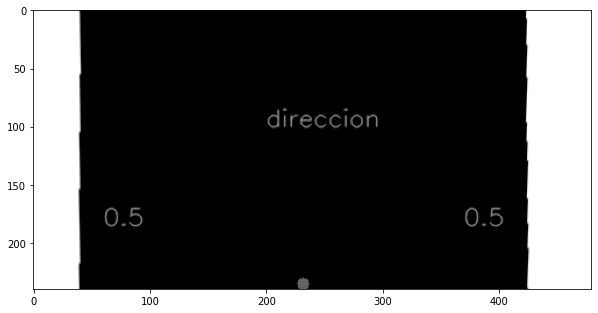

In [6]:
#Aplicamos todas las funciones
img = cv.imread('figuras/imagen_Erick_Casanova.jpg')
img_bin = binarizacion(img)
img_interes=area_interes(img_bin)
mid_point= punto_medio(img_interes)

# textos
text1 = str(0.50)
text2 = str(0.50)
text3 = 'direccion'

# Tipo de fuente
font = cv.FONT_HERSHEY_SIMPLEX

# origen de cada texto
org1 = (60, 185)
org2 = (370, 185)
org3 = (200, 100)

# Tamaño
fontScale = 0.7

# Color de la fuente
color = (150, 150, 150)

# Grosor de la linea del texto
thickness = 1

# Usamos la función cv.putText() para agregar texto
cv.putText(img_interes, text1, org1, font, fontScale,
color, thickness, cv.LINE_AA, False)
cv.putText(img_interes, text2, org2, font, fontScale,
color, thickness, cv.LINE_AA, False)
cv.putText(img_interes, text3, org3, font, fontScale,
color, thickness, cv.LINE_AA, False)

plt.figure(figsize=(10,7))
cv.circle(img_interes, (mid_point,235), 5, (100, 100,100 ), -1) ;
plt.imshow(img_interes,cmap='gray')
plt.show()

In [7]:
#Funcion suma normalizada izquierda
def sum_izquierda(imagen, valor_punto_medio):
    imagen_fix = np.where(imagen == 0, 255, 0)
    return np.round(np.sum( imagen_fix[:, :valor_punto_medio].sum(axis=0) )/(255*240*480),2)

In [8]:
#Funcion suma normalizada derecha
def sum_derecha(imagen, valor_punto_medio):
    imagen_fix = np.where(imagen == 0, 255, 0)
    return np.round(np.sum( imagen_fix[:, valor_punto_medio:].sum(axis=0) )/(255*240*480),2)

In [9]:
sum_derecha(img_interes, mid_point)

0.39

In [10]:
sum_izquierda(img_interes, mid_point)

0.39

In [11]:
#Testeo para invertir la matriz

img_interes_fix = np.where(img_interes == 0, 255, 0)
print(np.where(img_interes == 0, 255, 0))
print(img_interes_fix[:, :mid_point])
print(img_interes_fix[:, :mid_point].sum(axis=0))
print(np.round(np.sum( img_interes_fix[:, :mid_point].sum(axis=0) )/(255*240*480),2))
print('-------------')
print(img_interes[:, :mid_point])
print(img_interes[:, :mid_point].sum(axis=0))
print(np.round(np.sum( img_interes[:, :mid_point].sum(axis=0) )/(255*240*480),2))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0 14025 57120 61200 61200 61200 61200 61200 61200
 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200
 61200 59670 58395 57630 58650 59670 59670 59670 59670 59670 58650 57630
 58395 59670 61200 60690 60180 60180 60180 60180 60945 61200 60435 58650
 57885 58140 58905 58905 58905 58905 58905 58395 58140 59415 59925 61200
 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200 61200
 61200 61200 61200 61200 61200 

# Mostrando la dirección de giro

In [13]:
#Implementación de la dirección de giro en el video
import time
video = cv.VideoCapture('videos/video_Erick_Casanova.mp4')
while(video.isOpened()):
    ret, frame = video.read()
    if ret:
        
        alto=img.shape[0]
        ancho=img.shape[1]
        ratio=0.2
        frame = cv.resize(frame, (480,240), interpolation=cv.INTER_NEAREST)
        
        cv.imshow("video", frame)
        img_bin = binarizacion(frame)
        cv.polylines(img_bin, [pts_poligono], True, (100,100,100))
        cv.imshow("video binarizado", img_bin)
        img_interes = area_interes(img_bin)
        mid_point = punto_medio(img_interes)
        valor_sum_izquierda = sum_izquierda(img_interes,mid_point)
        valor_sum_derecha = sum_derecha(img_interes,mid_point)
        cv.putText(img_interes, str(valor_sum_izquierda), org1, font, fontScale,
        color, thickness, cv.LINE_AA, False)
        cv.putText(img_interes, str(valor_sum_derecha), org2, font, fontScale,
        color, thickness, cv.LINE_AA, False)
        delta = valor_sum_izquierda - valor_sum_derecha
        #print(delta)
        
        if delta > 0.07 :
            movimiento = "izquierda"

            
        elif delta < -0.07 :
            movimiento = "derecha"
            
        else:
            movimiento = "adelante"
            
        cv.putText(img_interes, movimiento, org3, font, fontScale,
        color, thickness, cv.LINE_AA, False)
        cv.circle(img_interes, (mid_point, 235), 5, (100,100,100), -1) ;
        cv.imshow("video area interes", img_interes)
        time.sleep(0.02)
        if cv.waitKey(1) & 0xFF == ord('q'):
             break
    else:
          break
            
video.release()
cv.destroyAllWindows()